# Nguyễn Ngọc Đạt 11200745

In [354]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Dùng thuật toán gradient descent, implement thuật toán logistic regeression

In [355]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [356]:
def cost_function(y_hat, y):
    return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [357]:
def gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y))

In [358]:
def logistic_regression(X, y, w, alpha, iters):
    cost_array = np.zeros(iters)
    for i in range(iters):
        # giá trị dự đoán 
        y_hat = sigmoid(np.dot(X, w))
        cost_num = cost_function(y_hat, y)
        cost_array[i] = cost_num
        # gradient descent
        gradient_val = gradient(X, y_hat, y)
        w = w - (gradient_val * alpha)
    return w, cost_array

In [359]:
def plotChart(cost_num):
    fig, ax = plt.subplots()
    ax.plot( cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

## Chạy toán toán logistic regression implement ở ý 2 cho dataset, https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv.

In [360]:
data = pd.read_csv('dataset_logistic_regression.csv')

In [361]:
data

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [362]:
X = data[['Lương', 'Thời gian làm việc']]
y = data['Cho vay']

In [363]:
x_cho_vay = data[data['Cho vay']==1].iloc[:,0:2]
x_tu_choi = data[data['Cho vay']==0].iloc[:,0:2]

Text(0, 0.5, 'kinh nghiệm (năm)')

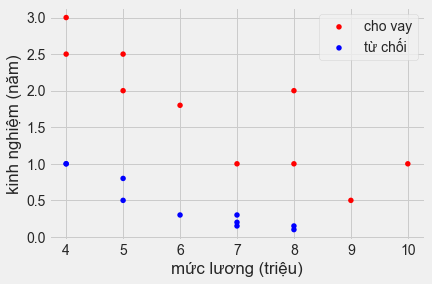

In [364]:
plt.scatter(x_cho_vay.iloc[:,0], x_cho_vay.iloc[:,1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi.iloc[:,0], x_tu_choi.iloc[:,1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend()
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [365]:
# Add 1 column to allow vectorized calculations
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [366]:
#Initial theta values
w = np.zeros(X.shape[1])
w

array([0., 0., 0.])

In [367]:
# Define hyperparameters
alpha = 0.01
iterations = 1000

In [368]:
# Starting values
y_hat = sigmoid(np.dot(X, w))
print("Initial cost value for w values {0} is: {1}".format(w, cost_function(y_hat,y)))

Initial cost value for w values [0. 0. 0.] is: 13.862943611198906


In [369]:
w, cost_num = logistic_regression(X, y, w, alpha, iterations)

In [370]:
w

array([-7.25194944,  0.62920922,  3.64209621])

In [375]:
# cost_num

In [372]:
y_hat = sigmoid(np.dot(X, w))
print("Final cost value for w values {0} is: {1}".format(w, cost_function(y_hat,y)))

Final cost value for w values [-7.25194944  0.62920922  3.64209621] is: 3.066392170544475


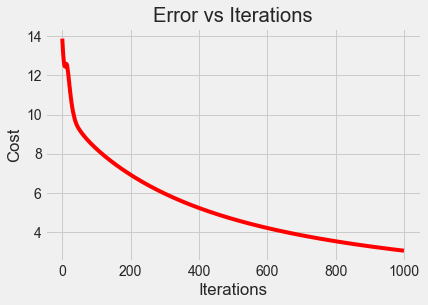

In [373]:
plotChart(cost_num)

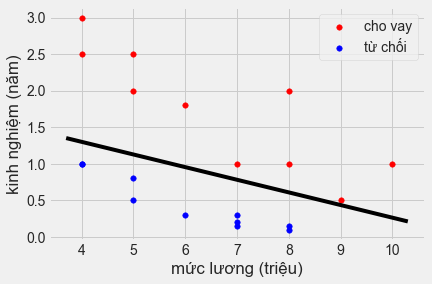

In [374]:
# visualizing decision boundary
slope = -(w[1] / w[2])
intercept = -(w[0] / w[2])

plt.scatter(x_cho_vay.iloc[:,0], x_cho_vay.iloc[:,1], c='red', s=30, label='cho vay')
plt.scatter(x_tu_choi.iloc[:,0], x_tu_choi.iloc[:,1], c='blue', s=30, label='từ chối')
plt.legend()
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");